<h1 style='text-align:center;font-weight:bold;color:orange'></h1>
<h1 style='text-align:center; color:darkblue'><b> From Churn to Loyalty: Telecommunications Customer Retention Strategies</b></h1>
<h5 style="text-align: center;"> Created by: Shafanda Nabil Sembodo</h5>

<a id="top"></a>

<div style="display: flex; justify-content: space-between;">
    <a href="../notebook/04 - Final Thoughts.ipynb" style="float: left; padding: 10px; text-decoration: none; background-color: #007bff; color: white; border-radius: 5px;">Previous</a>
    <a href="../notebook/02%20-%20Exploratory%20Data%20Analysis.ipynb" style="float: right; padding: 10px; text-decoration: none; background-color: #007bff; color: white; border-radius: 5px;">Next</a>
</div>

In [43]:
# Importing necessary libraries
import numpy as np  
import pandas as pd 
import seaborn as sns   
import matplotlib.pyplot as plt 
import warnings 

# Hide warning issues to prevent unnecessary output clutter
warnings.filterwarnings("ignore")

# Setting the maximum column width for pandas display to 100 characters
pd.options.display.max_colwidth = 100

# Applying the 'seaborn' style to matplotlib for consistent and visually appealing plots
plt.style.use('seaborn')   

<a id="numerical"></a>
## <b><span style='color:darkturquoise'>Section 1 |</span><span style='color:darkblue'> Understanding Telco Customer Churn Challenges</span></b>

____

In any data-driven project, a deep understanding of the business context is crucial to ensure the solutions address the most pressing challenges effectively. For the telecommunications industry, customer churn represents a critical issue, as it directly impacts revenue, customer acquisition costs, and long-term profitability. Without a clear comprehension of the underlying business dynamics, it becomes challenging to identify meaningful insights, define relevant objectives, or develop actionable strategies. In this section, we will explore the urgency of establishing a robust business understanding to guide the Telco Customer Churn prediction project and maximize its impact.

<a id="basic"></a>
### <b><span style='color:darkblue'> 1.1 Business Context</span></b>

Customer churn, **the condition where a customer stops purchasing a product or service**, is a central issue in every industry. If not properly addressed, customer churn can significantly impact a company's budget allocation strategy and ultimately its profit. A company's inability to understand customer behavior and the reasons behind churn can lead to misguided strategies and inefficient use of one of their most precious resources: money. Companies know that the cost of retaining a customer is about five times lower than the cost of acquiring a new one (CAC). Therefore, accurately identifying which groups of customers are likely to churn can prevent wasted expenditures and save significant amounts of money.

Financially, poor budget allocation strategies affect a company in several ways. Misallocating funds leads to unnecessary costs, thereby eroding profits. To illustrate, consider the following hypothetical scenario: if a company has a 0% churn rate and an average customer acquisition cost (CAC) of USD 50, acquiring 10K customers costs USD 500K. However, if the churn rate is 10%, the company needs to spend an additional USD 50K to acquire 1K new customers just to maintain the same number of customers. This increased expenditure worsens if the churn rate is higher. By studying and understanding their customers, a company can implement preemptive retention strategies that cost significantly less—say USD 10K—to maintain existing customers, compared to the higher costs of acquiring new ones.

Furthermore, a company will need to increase the customer acquisition budget to, at the very least, offset the direct financial consequences of churn. Marketing will not be the only department requiring additional expenses; various sections within the company must work to win back customers and enhance the customer experience. This includes R&D costs for improving the user interface and customer service efforts to handle customer complaints effectively.

<a id="basic"></a>
### <b><span style='color:darkblue'> 1.2 Business Task</span></b>

Today, the company faces a significant challenge as nearly one-third (26.5%) of its total customers no longer make purchases, indicating a high rate of customer churn. This exceeds the average customer churn rate of 21% observed in industries such as online retail and telecommunications in the United States, as reported by [Statista, 2022](https://www.statista.com/statistics/816735/customer-churn-rate-by-industry-us/). The similarity of the company's churn rate to the industry average is alarming and highlights the need for immediate action to reduce churn, as, if not addressed, this 26.5% loss will lead to a decline in revenue and overall business performance. Companies are required to immediately implement the right strategies to retain existing customers and foster long-term loyalty.


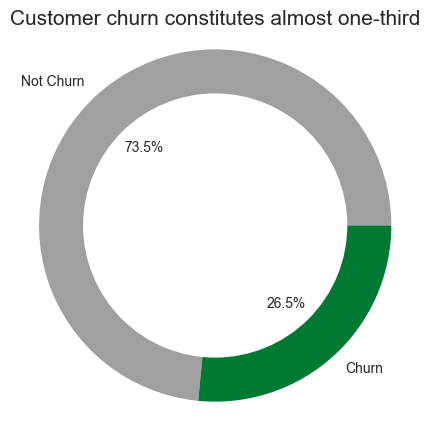

In [44]:
# Import the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('../data/data.csv')

# Calculate the churn rate by counting the occurrences of each value in the 'Churn' column
# and calculating their proportions (in percentages).
target_col = pd.DataFrame(
    {'count': data['Churn'].value_counts(),  # Absolute counts of 'Churn' values
     'proportion': round(data['Churn'].value_counts(normalize=True) * 100, 2)  # Proportions in percentage
    }
)

# Create a donut chart to visualize the churn rate distribution
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)  # Set the figure size and resolution
ax.pie(
    target_col['count'],  # Use the count data for the pie chart
    labels=['Not Churn', 'Churn'],  # Labels for the two categories
    autopct='%1.1f%%',  # Display percentages with one decimal place
    colors=['#A0A0A0', '#007A33']  # Custom colors for the chart
)

# Add a white circle in the center to create the "donut" effect
centre_circle = plt.Circle((0, 0), 0.75, fc='white')  # Define the circle properties
fig.gca().add_artist(centre_circle)  # Add the circle to the plot

# Ensure the pie chart is displayed as a circle rather than an ellipse
ax.axis('equal')

# Set the title of the plot with a custom font size
plt.title('Customer churn constitutes almost one-third', fontdict={'fontsize': 15})

# Display the chart
plt.show()

Given the importance of this issue, our main business concern is **how the company can decrease the customer churn issue by 10%** by both exploring the company's historical data and predicting the possibility of customers to churn. Analyzing historical data can provide an understanding of why customers churned in the past and can use the insights for data-driven decision making by the respective teams (e.g, Customer Success, Marketing, Product, Sales, and Finance) but the Customer Success team will be the most directly responsible team in the company for handling the churn as customer experience and churn reduction are their concerns. And for this reason, **the main stakeholder of the current project will be the Customer Experience team, especially the manager**. 

So, to achieve the main goal of reducing the churn rate by 10%, we break it down into two main objectives:

- **First, we aim to investigate the possible reasons for the churn**. From this analysis, the stakeholder can understand the possible reasons for past customers to churn and take necessary actions to mitigate the risk. While we can associate the churn with different factors in the data, the direct contributing factors of the churn remains an open question due to inavailability of data concerning customer's reason for leaving (e.g., via an open-ended survey). 

- **Second, we aim to build a classification model to predict whether a current customer will stop buying the company's products (churn) or not (not churn)**. After getting the prediction, we proceed identifying what factors contribute to the churn by investigating the predictitions. The model therefore can be used to flag customers with high probability of churn, and enables the stakeholders to proactively mitigate the possibility of churn by identifying at-risk customers. Besides, as the model can identify at-risk customers, the stakeholder can also prioritize outreach according to predicted churn risk so they can be more efficient in allocating resources.

<a id="basic"></a>
### <b><span style='color:darkblue'> 1.3 Success Metrics</span></b>

As we have two goals i.e. Data Analysis and Machine Learning Model, our project will involve different metrics for different purposes. For the data analysis, our main metric will be churn rate. In short, customer churn rate is the percentage of customers who stop making purchases from an online store within a specific period. And for the Machine Learning Model to predicting whether customer will churn, let us consider the following two possible misclassifications made by the classification model. The business impacts of each misclassification will guide us to determine which metric(s) is more suitable for the company's business case.

- **Type I Error (False Positive)**: This error happens when the model predicts a customer to churn when they actually don't. This misclassification leads to unnecessary retention actions, especially providing discounts for next purchase. In SaaS industry, the customer retention cost is 4 times cheaper than the customer acquisition cost, that is USD694 per customer ([FirstPageSage, 2024](https://firstpagesage.com/reports/average-customer-acquisition-cost-cac-by-industry-b2b-edition-fc/)), meaning the retention cost per customer will be around USD173.3. With these values, the company spends USD173,300 per 1000 misclassifications per month.

- **Type II Error (False Negative)** A model predicts a customer to not churn when actually they do. Making a type II error leads to the company to spend money on acquiring a new customer. According to [FirstPageSage (2024)](https://firstpagesage.com/reports/average-customer-acquisition-cost-cac-by-industry-b2b-edition-fc/), the customer acquisition cost (CAC) for e-commerce is USD694 per customer. As a consequence, for every 1000 mistakes, the model will cost USD694,000 per month. This significant revenue loss underscores the criticality of the prevention.

Since the financial cost of type II errors (false negatives) is significantly higher than type I errors (false positives), but without neglecting type I errors, we decided to use the F5 score as the evaluation metric for our classification model. The F5 score considers both recall and precision, with five times the weight given to recall. In other words, this value answers, “Of all the customers who actually churned, how well did the model predict these cases considering the precision of the prediction?” A high F5 value indicates that the model is effective in capturing a large number of positive cases (churners) and reduces the likelihood of significant financial costs due to undetected churn by focusing on minimizing type II errors.

<a id="numerical"></a>
## <b><span style='color:darkturquoise'>Section 2 |</span><span style='color:darkblue'> Assessing the Telco Data Landscape</span></b>

____

Data examination and preparation are foundational steps that ensure the dataset is clean, consistent, and meaningful. For the Telco Customer Churn dataset, these processes are particularly vital as they uncover hidden patterns, handle missing or inconsistent data, and transform raw information into actionable insights. Without a thorough examination and proper preparation, even the most sophisticated analysis may yield unreliable or misleading result.

<a id="basic"></a>
### <b><span style='color:darkblue'> 2.1 Dataset Dictionary</span></b>

The dataset represents customer profiles who have left the telecommunication company. A churn in telco and other subscription-based services means a situation when the customer leaves the service provider. This dataset provides a comprehensive view of customer attributes, behaviors, and preferences. Please note that whether all variables will be used for data analysis and machine learning modeling will be determined based on findings during data exploration. 


In [45]:
data.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1201,6789-HJBWG,Female,No,No,No,12,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,49.40,611.65,No
4808,8144-DGHXP,Female,No,No,No,54,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,80.60,4299.95,No
541,2782-LFZVW,Female,No,No,No,11,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,58.95,601.60,No


The variables can be grouped into three main categories:

1. **Demographics**

    This category captures personal information about customers, offering insights into their profiles:

- `customerID`: A unique identifier for each customer
- `gender`: The gender of the customer
- `SeniorCitizen`: Indicates if the customer is a senior citizen
- `Partner`: Indicates if the customer has a partner
- `Dependents`: Indicates if the customer has dependents

2. **Service Subscription** 

    This category details the services customers subscribe to, providing key information about usage patterns and potential dissatisfaction:

- `tenure`: Number of months the customer has stayed with the company.
- `PhoneService`: Indicates if the customer has a phone service
- `MultipleLines`: Indicates if the customer has multiple phone lines
- `InternetService`: Type of internet service subscribed by the customer
- `OnlineSecurity`: Indicates if the customer has online security service
- `OnlineBackup`: Indicates if the customer has an online backup service
- `DeviceProtection`: Indicates if the customer has device protection service 
- `TechSupport`: Indicates if the customer has tech support service
- `StreamingTV`: Indicates if the customer has streaming TV service
- `StreamingMovies`: Indicates if the customer has streaming movie service

3. **Billing and Payment**

    This category reflects customer affordability, payment preferences, and loyalty, which are critical for churn predictions:

- `Contract`: Type of contract the customer has
- `PaperlessBilling`: Indicates if the customer is enrolled in paperless billing
- `PaymentMethod`: Customer's payment method
- `MonthlyCharges`: The amount charged to the customer per month.
- `TotalCharges`: The total amount charged to the customer over the tenure period.

<a id="basic"></a>
### <b><span style='color:darkblue'> 2.2 Data Condition: Quality and Representativeness</span></b>

Unfound and unresolved issues around data quality will undermine the trust and accuracy of the work results, we built a function to perform a basic sanity check which will include column name, row count, data type, missing value rate, duplicate rate, unique value, and sample.

In [46]:
# Define a function to inspect the dataframe and return a summary
def inspect_dataframe(df):
    # Print the number of rows and columns in the dataframe
    print(f'The dataframe contains {df.shape[0]} rows and {df.shape[1]} cols.')
    
    # Create a summary dictionary containing:
    # - Column names
    # - Data types of each column
    # - Percentage of missing values per column
    # - Percentage of duplicate rows in the dataframe
    # - Sample unique values for each column
    # - Count of unique values per column
    summary = {
        'ColumnName': df.columns.values.tolist(),
        'DataType': df.dtypes.values.tolist(),
        'NAPct': (df.isna().mean() * 100).round(2).tolist(),  # NaN percentage per column
        'DuplicatePct': (df.duplicated().sum()/len(df)*100).round(2),  # Percentage of duplicate rows
        'Sample': [df[col].unique() for col in df.columns],  # Sample of unique values per column
        'UniqueValue': df.nunique().tolist()  # Number of unique values per column
    }
    
    # Return the summary as a DataFrame
    return pd.DataFrame(summary)

# Call the function to inspect the dataframe and output the summary
inspect_dataframe(data)

The dataframe contains 7043 rows and 21 cols.


,ColumnName,DataType,NAPct,DuplicatePct,Sample,UniqueValue
0,customerID,object,0.00,0.0,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 9237-HQITU, 9305-CDSKC, 1452-KIOVK, 6713-OKOMC,...",7043
1,gender,object,0.00,0.0,"[Female, Male]",2
2,SeniorCitizen,object,0.00,0.0,"[No, Yes]",2
3,Partner,object,0.00,0.0,"[Yes, No]",2
4,Dependents,object,0.00,0.0,"[No, Yes]",2
5,tenure,int64,0.00,0.0,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 21, 12, 30, 47, 72, 17, 27, 5,...",73
6,PhoneService,object,0.00,0.0,"[No, Yes]",2
7,MultipleLines,object,0.00,0.0,"[No phone service, No, Yes]",3
8,InternetService,object,0.00,0.0,"[DSL, Fiber optic, No]",3
9,OnlineSecurity,object,0.00,0.0,"[No, Yes, No internet service]",3


**Key Takeaways**
- The dataset comprises 7,043 rows and 21 columns, with 18 categorical (object) columns and 3 numerical columns.
- Each row represents a unique customer, as evidenced by the corresponding number of unique values.
- The dataset is clean, with no missing or duplicate values.
- Data consistency is well-maintained, with a uniform format and consistent typography across columns.
- All categorical columns have a manageable number of unique values, with none exhibiting high cardinality (each contains fewer than 10 unique values). 
- A small percentage (0.16%) of missing values is present in the TotalCharges column, which requires appropriate handling.

<a id="basic"></a>
### <b><span style='color:darkblue'> 2.3 Data Size: Amount and Range</span></b>

Once we have established an understanding of the different types & quality of data, we can switch our examination towards the shape and size of this data, looking at the quantitative attributes across all variables. Statistical methods will assist in describing further physical characteristics. 

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.76,30.09,18.25,35.50,70.35,89.85,118.75
TotalCharges,7032.0,2283.30,2266.77,18.80,401.45,1397.48,3794.74,8684.80


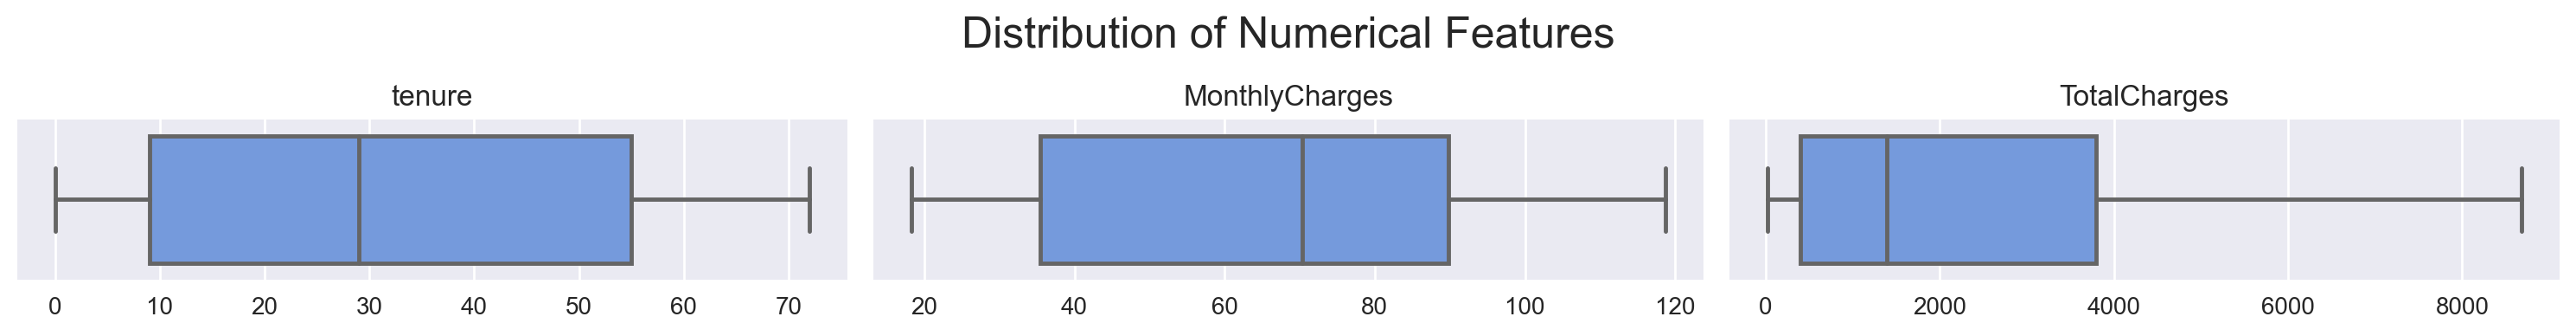

In [47]:
# Get statistical summary for numerical variables 'tenure', 'MonthlyCharges', and 'TotalCharges'
display(data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().round(2).transpose())

# Set up the figure size for better visualization of boxplots
plt.figure(figsize=(15, 7), dpi=200)

# Set the main title of the plot
plt.suptitle('Distribution of Numerical Features', fontsize=18)

# Loop through the list of numerical columns to generate boxplots
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    # Create a subplot for each boxplot
    plt.subplot(5, 3, i+1)
    
    # Plot the boxplot for the current column
    sns.boxplot(x=data[col], color='cornflowerblue', orient='v')
    
    # Set the title of the subplot to the column name
    plt.title(f'{col}')
    
    # Remove x-axis labels for cleaner visuals
    plt.xlabel(None)

# Adjust the layout to ensure no overlap between subplots
plt.tight_layout()

# Display the final plot with all boxplots
plt.show()

**Key Takeaways**

The box plots above display the distribution of three numerical features: tenure, MonthlyCharges, and TotalCharges. Each box plot provides insights into the spread, central tendency, and possible outliers for the respective features.

- **Tenure:** Most customers have been with the company for a moderate duration. 
    - The ranges from 0 (minimum) to approximately 70 (maximum) months. 
    - Half of the customers have a tenure between 9 and 55 months. 
    - 50% of the customers have a tenure of less than or equal to 29 months.
    - There are no apparent outliers in the tenure distribution, as all data points fall within the whiskers. 
    - The distribution appears slightly skewed to the right since the median is closer to the 25th percentile.
- **MonthlyCharges:** Customers’ monthly spending is centered around 70.35 USD, with a balanced distribution.
    - The feature ranges from around 18.25 (minimum) to approximately 118.75 (maximum) USD.
    - 50% of customers are charged between 35.5 and 89.9 USD per month.
    - The median is around 70.35 USD, which is the typical monthly charge for a customer.
    - No visible outliers are detected as all data points lie within the whiskers. 
    - The distribution seems fairly symmetric, with the median approximately in the center of the box.
- **TotalCharges:** This feature has significant variability and positive skewness, potentially influenced by tenure and monthly charges.
    - The feature ranges from 18.80 (minimum) to around 8684 (maximum) USD.
    - Half of the customers have a tenure between 2266 USD and 3794 USD.
    - The median is approximately 1397 USD, representing the typical total charges for a customer. 
    - There are potential extreme values in TotalCharges, indicated by the longer right whisker. 
    - These may represent high-value customers who have been subscribed for a long time or opted for premium services. The feature is positively skewed, as the median is closer to the 25th percentile and the whisker on the right is longer.
- Moreover, there seem to be no weird values in the dataset. For instance, there are no values lower than zeros. All values seem to be possible to happen in real-life. 

In [48]:
# Get statistical summary for categorical var
data.describe(include='object', ).round(2).transpose()

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


**Key Takeaways**

The provided dataset offers an overview of customer characteristics and service usage for a telecommunications company, with detailed frequency distribution and categorical insights. Here’s a breakdown of key observations:

- **Customer Demographics:** There are 7,043 unique customers in the dataset, each represented by a unique customerID. The gender distribution is nearly balanced, with 3,555 males (50.5%) and 3,488 females (49.5%). Most customers (5,901, or 83.8%) are not senior citizens, indicating a younger customer base.
- **Household Information:** A significant portion of customers do not have a partner (3,641, or 51.7%) or dependents (4,933, or 70%), suggesting many subscribers are likely single or in non-family households.
- **Service Usage:** Phone service is widely adopted, with 6,361 customers (90.3%) subscribing, though only 3,390 (48.1%) have multiple lines. Internet service preferences show Fiber optic as the top choice (3,096, or 44%), while many customers lack additional online features such as OnlineSecurity (3,498, or 49.7%), OnlineBackup (3,088, or 43.8%), and TechSupport (3,473, or 49.3%).
- **Entertainment Preferences:** Streaming services are underutilized, with fewer customers opting for StreamingTV (2,810, or 39.9%) and StreamingMovies (2,785, or 39.5%).
- **Billing and Payment:** Most customers (3,875, or 55%) are on a Month-to-month contract, and PaperlessBilling is preferred by 4,171 customers (59.2%). The most common payment method is Electronic check, used by 2,365 customers (33.6%).
- **Churn Behavior:** The majority of customers (5,174, or 73.5%) have not churned, while 26.5% have left. This indicates a moderate churn rate, emphasizing the need to analyze factors driving customer attrition.

<a href="#top" style="display: inline-block; padding: 10px; text-decoration: none; background-color: #007bff; color: white; border-radius: 5px; margin-top: 20px;">Back to Top</a>